# Promediación

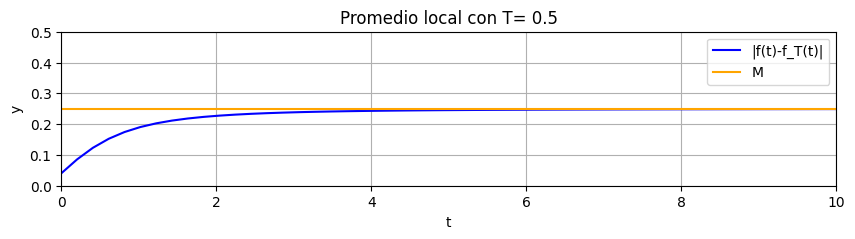

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = .5
L = 10
 
t = np.linspace(0,L,50)
h = np.sqrt(t**2+1)
q = 1/T*(1/2*((T + t)*np.sqrt(1 + (T + t)**2) + np.arcsinh(T + t)) - 1 / 2*(t*np.sqrt(1 + t**2) + np.arcsinh(t)))
d = np.abs(h-q)
M = T/2
M = M*np.ones(50)
fig, ax = plt.subplots(figsize = (10,2))
ax.set_title(f'Promedio local con T= {T}')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_xlim(0, L)
ax.set_ylim(0, 0.5)

plt.plot(t, d, label=f'|f(t)-f_T(t)|', color='blue')
plt.plot(t, M, label=f'M', color='orange')

plt.legend()
plt.grid(True)
plt.show()

# Plano Fase

In [2]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt

Sistemas de ecuaciones

In [8]:
nombre = "Ecuación de Rayleigh"#'Van der Pol'
# Parámetros
mu=.7 # Van der Pol
# Forma cartesiana
def f(z):
    x=z[0]
    y=z[1]
    dx = y 
    dy = mu*(1-y**2)*y-x
    return np.array([dx,dy])

# Forma polar 
def polar(z):
    r=z[0]
    theta=z[1]
    dr = mu/8*r*(4-r**2)
    dtheta = 1
    return np.array([dr,dtheta])

Runge - Kutta

In [5]:
# Cartesianas
def rk4(y0,h,n):
  y=np.zeros((2,n+1))
  y[:,0]=y0
  for k in range(n):
    k1=f(y[:,k])
    k2=f(y[:,k]+(h/2)*k1)
    k3=f(y[:,k]+(h/2)*k2)
    k4=f(y[:,k]+h*k3)
    y[:,k+1]=y[:,k]+(h/6)*(k1+2*k2+2*k3+k4)
  return y

# Polares
def rk4polar(y0,h,n):
  y=np.zeros((2,n+1))
  y[:,0]=y0
  for k in range(n):
    k1=polar(y[:,k])
    k2=polar(y[:,k]+(h/2)*k1)
    k3=polar(y[:,k]+(h/2)*k2)
    k4=polar(y[:,k]+h*k3)
    y[:,k+1]=y[:,k]+(h/6)*(k1+2*k2+2*k3+k4)
  return y

In [10]:
def runge_kutta(func, y0, h, n):
    """
    Implementación del método de Runge-Kutta de cuarto orden para sistemas de ecuaciones diferenciales.
    
    Parámetros:
    - func: función que calcula las derivadas del sistema
    - y0: condiciones iniciales (array de numpy)
    - h: tamaño del paso
    - n: número de pasos
    
    Retorna:
    - y: matriz con la solución del sistema
    """
    y = np.zeros((len(y0), n+1))
    y[:,0] = y0
    
    for k in range(n):
        k1 = func(y[:,k])
        k2 = func(y[:,k] + (h/2)*k1)
        k3 = func(y[:,k] + (h/2)*k2)
        k4 = func(y[:,k] + h*k3)
        y[:,k+1] = y[:,k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return y

Arreglos

In [11]:
# Crea una cuadrícula de valores x e y
L=3 # Límites
n = 30 # Número de puntos
x = np.linspace(-L, L, n)  # Crea un vector de n puntos entre -L y L
y = np.linspace(-L, L, n)  # Crea un vector de n puntos entre -L y L
X, Y = np.meshgrid(x, y)  # Crea la cuadrícula

# Calcula las derivadas en cada punto de la cuadrícula
d = f(np.array([X, Y]))
dX=d[0,:,:]
dY=d[1,:,:]

##############################
y01=np.array([0.01,-0.01])
z1=runge_kutta(f,y01,0.1,5000)
x1=z1[0,:]
y1=z1[1,:]

y02=np.array([2,-3.5])
z2=runge_kutta(f,y02,0.1,5000)
x2=z2[0,:]
y2=z2[1,:]

Gráfica

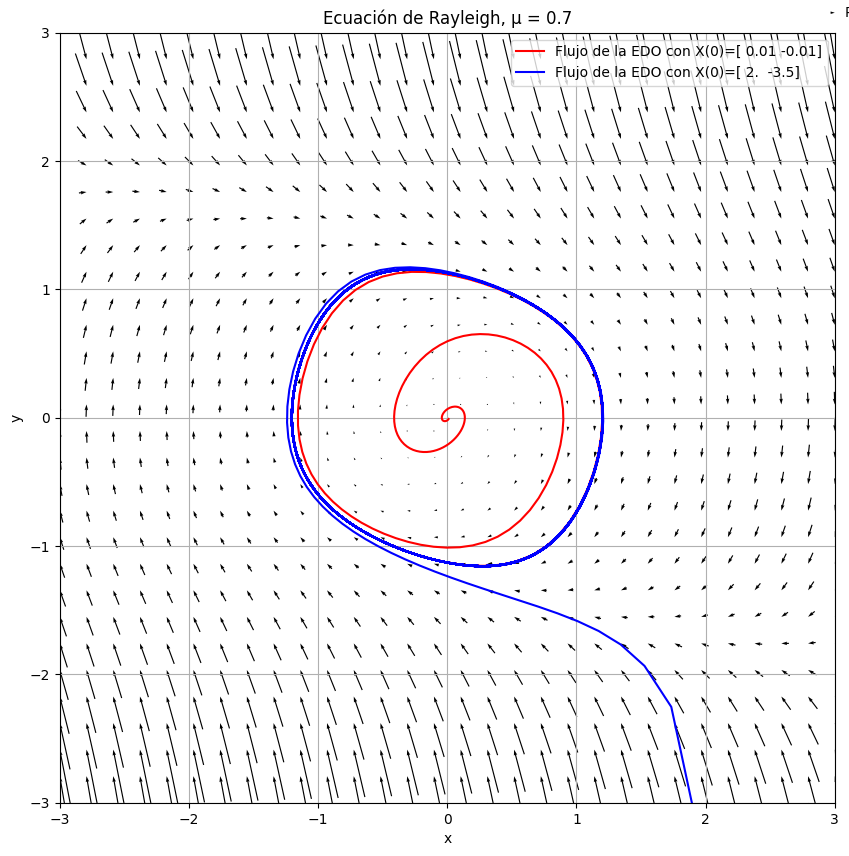

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
q = ax.quiver(X, Y, dX, dY, units='x', pivot='tip', width=0.009, scale=30)
ax.quiverkey(q, 0.9, 0.9, 1, label = 'Plano fase',labelpos='E',coordinates='figure')
ax.set_title(f'{nombre}, \u03BC = {mu}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-L, L)
ax.set_ylim(-L, L)

plt.plot(x1, y1, label=f'Flujo de la EDO con X(0)={y01}', color='red')
plt.plot(x2, y2, label=f'Flujo de la EDO con X(0)={y02}', color='blue')

plt.legend()
plt.grid(True)
plt.show()

# Introducción

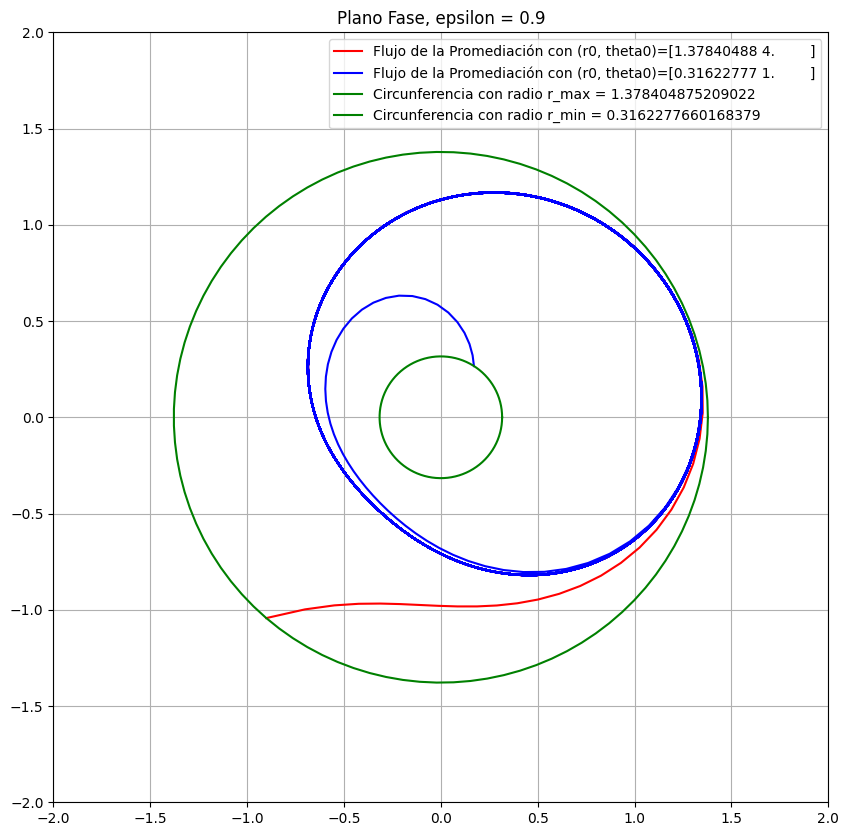

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

mu=.9
 
def polar(z):
    r=z[0]
    theta=z[1]
    dr = r*(1-r**2)+mu*r*np.cos(theta)
    dtheta = 1
    return np.array([dr,dtheta])

#############################

def rk4polar(y0,h,n):
  y=np.zeros((2,n+1))
  y[:,0]=y0
  for k in range(n):
    k1=polar(y[:,k])
    k2=polar(y[:,k]+(h/2)*k1)
    k3=polar(y[:,k]+(h/2)*k2)
    k4=polar(y[:,k]+h*k3)
    y[:,k+1]=y[:,k]+(h/6)*(k1+2*k2+2*k3+k4)
  return y


##############################
r1 = np.sqrt(1+mu)
r2 = np.sqrt(1-mu)
theta = np.linspace(0, 2*np.pi, 100)
c1 = r1 * np.cos(theta)
d1 = r1 * np.sin(theta)
c2 = r2 * np.cos(theta)
d2 = r2 * np.sin(theta)
##############################



############## POLAR ###################

z01=np.array([np.sqrt(1+mu),4])
zz1=rk4polar(z01,0.1,5000)
r1=zz1[0,:]
theta1=zz1[1,:]

z02=np.array([np.sqrt(1-mu),1])
zz2=rk4polar(z02,0.1,5000)
r2=zz2[0,:]
theta2=zz2[1,:]

##############################
L =2
fig, ax = plt.subplots(figsize = (10,10))
#q = ax.quiver(X, Y, dX, dY, units='x', pivot='tip', width=0.009, scale=30)
#ax.quiverkey(q, 0.9, 0.9, 1, label = 'Plano fase',labelpos='E',coordinates='figure')
ax.set_title(f'Plano Fase, epsilon = {mu}')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
ax.set_xlim(-L, L)
ax.set_ylim(-L, L)
#ax.scatter(X, Y, color='0.5', s=1)
#plt.plot(x1, y1, label=f'Flujo de la EDO con X(0)={y01}', color='red')
#plt.plot(x2, y2, label=f'Flujo de la EDO con X(0)={y02}', color='blue')
plt.plot(r1*np.cos(theta1),r1*np.sin(theta1) , label=f'Flujo de la Promediación con (r0, theta0)={z01}', color='red')
plt.plot(r2*np.cos(theta2),r2*np.sin(theta2) , label=f'Flujo de la Promediación con (r0, theta0)={z02}', color='blue')

####
plt.plot(c1, d1, color='green',label=f'Circunferencia con radio r_max = {np.sqrt(1+mu)}')
plt.plot(c2, d2, color='green',label=f'Circunferencia con radio r_min = {np.sqrt(1-mu)}')
##

plt.legend()
plt.grid(True)
plt.show()

# Gráfica

/tmp/ipykernel_21348/685325623.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


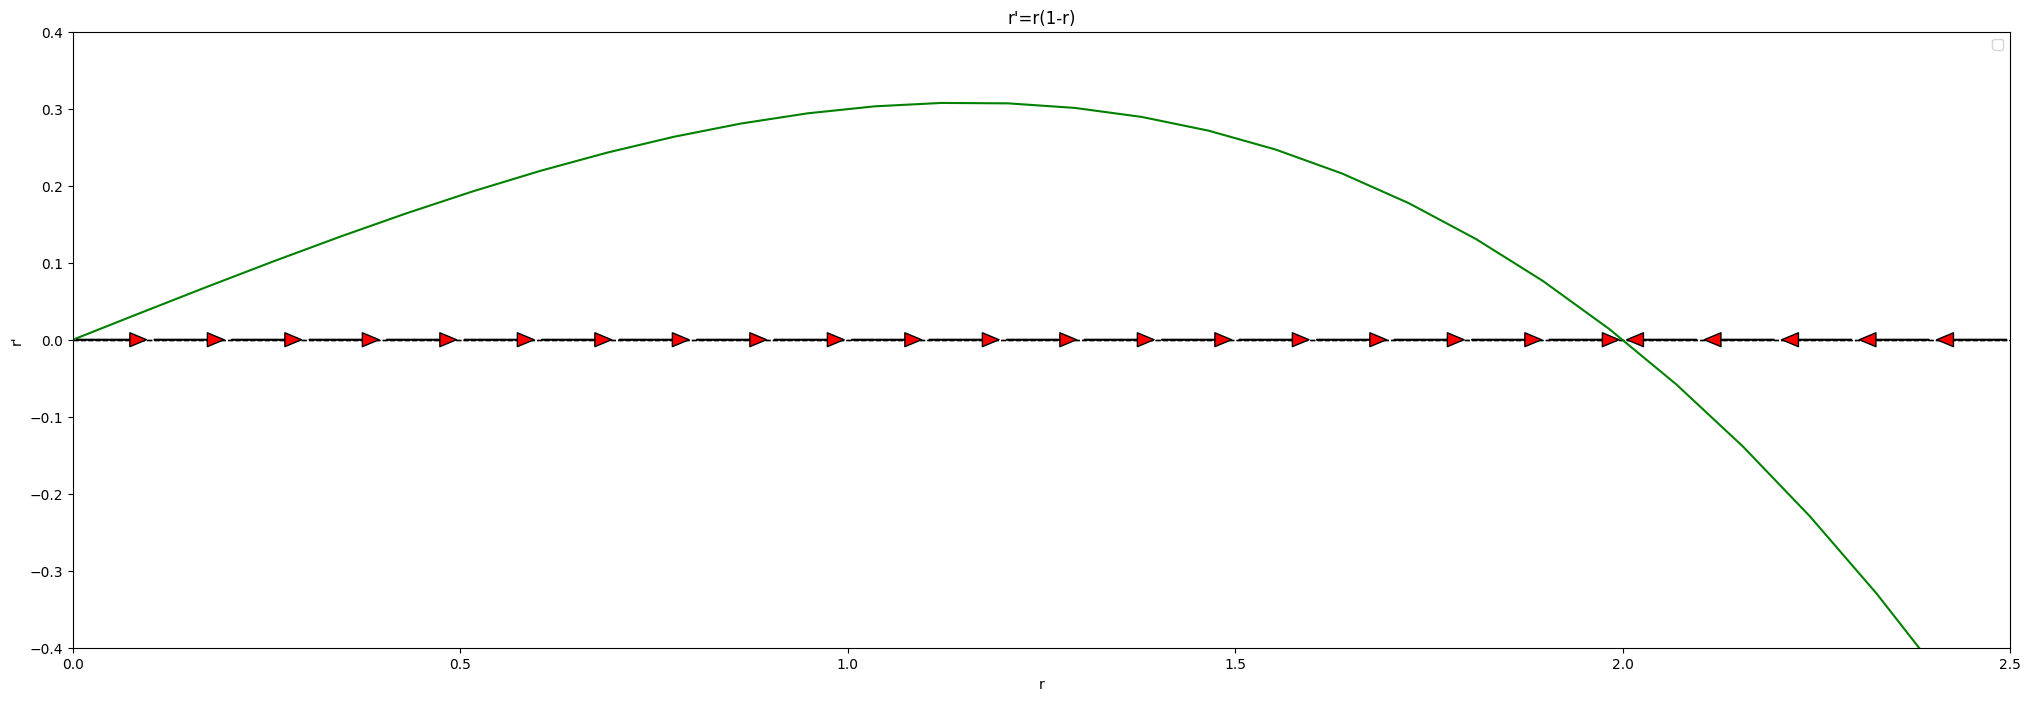

In [6]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.2
 
def f(r):
    y = r*(1-r**2)
    return y

def g(r):
    g = epsilon/2*r*(4-r**2)
    return g

r = np.linspace(0, 2.5, 30)

y = g(r)

fig, ax = plt.subplots(figsize = (25,8))
ax.set_title('r\'=r(1-r)')

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.axhline(0, color='black', linestyle='--', linewidth=1)

for k in range(20):
    ax.annotate('', xy=(0.1*(k+1), 0), xytext=(0.1*k, 0),
            arrowprops=dict(facecolor='red', shrink=0.05, width=0.5, headwidth=10))  # Flecha en eje X
    
for k in range(5):
    ax.annotate('', xy=(2.5-0.1*(k+1), 0), xytext=(2.5-0.1*k, 0),
            arrowprops=dict(facecolor='red', shrink=0.05, width=0.5, headwidth=10))  # Flecha en eje X

ax.set_xlabel('r')
ax.set_ylabel('r\'')
ax.set_xlim(0, 2.5)
ax.set_ylim(-0.4, 0.4)
#ax.scatter(X, Y, color='0.5', s=1)
plt.plot(r, y, label=f'', color='green')

plt.legend()
#plt.grid(True)
plt.show()

# Código Unicode - Letras griegas

Aquí tienes los códigos Unicode para todas las letras griegas:

**Letras griegas mayúsculas:**

| Letra | Unicode | Letra | Unicode |
|-------|---------|-------|---------|
| Α (Alpha) | \u0391 | Ν (Nu)     | \u039D |
| Β (Beta)  | \u0392 | Ξ (Xi)     | \u039E |
| Γ (Gamma) | \u0393 | Ο (Omicron)| \u039F |
| Δ (Delta) | \u0394 | Π (Pi)     | \u03A0 |
| Ε (Epsilon)| \u0395 | Ρ (Rho)   | \u03A1 |
| Ζ (Zeta)  | \u0396 | Σ (Sigma)  | \u03A3 |
| Η (Eta)   | \u0397 | Τ (Tau)    | \u03A4 |
| Θ (Theta) | \u0398 | Υ (Upsilon)| \u03A5 |
| Ι (Iota)  | \u0399 | Φ (Phi)    | \u03A6 |
| Κ (Kappa) | \u039A | Χ (Chi)    | \u03A7 |
| Λ (Lambda)| \u039B | Ψ (Psi)    | \u03A8 |
| Μ (Mu)    | \u039C | Ω (Omega)  | \u03A9 |

**Letras griegas minúsculas:**

| Letra | Unicode | Letra | Unicode |
|-------|---------|-------|---------|
| α (alpha) | \u03B1 | ν (nu)     | \u03BD |
| β (beta)  | \u03B2 | ξ (xi)     | \u03BE |
| γ (gamma) | \u03B3 | ο (omicron)| \u03BF |
| δ (delta) | \u03B4 | π (pi)     | \u03C0 |
| ε (epsilon)| \u03B5 | ρ (rho)   | \u03C1 |
| ζ (zeta)  | \u03B6 | σ (sigma)  | \u03C3 |
| η (eta)   | \u03B7 | τ (tau)    | \u03C4 |
| θ (theta) | \u03B8 | υ (upsilon)| \u03C5 |
| ι (iota)  | \u03B9 | φ (phi)    | \u03C6 |
| κ (kappa) | \u03BA | χ (chi)    | \u03C7 |
| λ (lambda)| \u03BB | ψ (psi)    | \u03C8 |
| μ (mu)    | \u03BC | ω (omega)  | \u03C9 |

Puedes usar estos códigos Unicode en tus cadenas de texto en Python para representar las letras griegas.